In [13]:
# creating almost linear data
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3*np.random.randn(100, 1)

Reference: Normal Equations (Solution for single feature model)

In [14]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [15]:
theta_best

array([[3.93608127],
       [0.52860656]])

In [16]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.93608127],
       [4.99329438]])

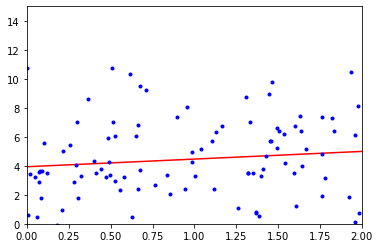

In [17]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Computing the same using scikit learn

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.93608127]), array([[0.52860656]]))

In [19]:
lin_reg.predict(X_new)

array([[3.93608127],
       [4.99329438]])

In [21]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.93608127],
       [0.52860656]])